<img src="UNetstructure.png" width=1000 height=1000 />

In [1]:
import tables as tb
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import invisible_cities.io.dst_io as dio

from utils.plotting_utils import plot_cloud_voxels, plot_cloud_voxels_and_hits, plot_3d_hits, plot_3d_vox

In [2]:
labelled_file = '/Users/mperez/NEXT/data_labelling/examples/Tl208_NEW_v1_03_01_nexus_v5_03_04_cut8.beersheba_label_4mm_fid.h5'

In [3]:
with tb.open_file(labelled_file) as h5in:
    print(h5in)

/Users/mperez/NEXT/data_labelling/examples/Tl208_NEW_v1_03_01_nexus_v5_03_04_cut8.beersheba_label_4mm_fid.h5 (File) ''
Last modif.: 'Sat Jan 15 12:24:06 2022'
Object Tree: 
/ (RootGroup) ''
/DATASET (Group) ''
/DATASET/BeershebaVoxels (Table(506999,), shuffle, zlib(4)) ''
/DATASET/BinsInfo (Table(5,), shuffle, zlib(4)) ''
/DATASET/EventsInfo (Table(2506,), shuffle, zlib(4)) ''
/DATASET/MCHits (Table(624968,), shuffle, zlib(4)) ''
/DATASET/MCVoxels (Table(137394,), shuffle, zlib(4)) ''



In [4]:
labelled_MC_voxels = dio.load_dst(labelled_file, 'DATASET', 'MCVoxels')
labelled_MC_hits   = dio.load_dst(labelled_file, 'DATASET', 'MCHits')
labelled_beersheba_voxels = dio.load_dst(labelled_file, 'DATASET', 'BeershebaVoxels')
eventInfo = dio.load_dst(labelled_file, 'DATASET', 'EventsInfo')
binsInfo  = dio.load_dst(labelled_file, 'DATASET', 'BinsInfo')

In [7]:
labelled_beersheba_voxels[labelled_beersheba_voxels.dataset_id == 0]

xbin  ybin  zbin    energy  binclass   MC_ener  ratio  segclass  \
0     -19     7    60  0.000521         1       NaN    NaN         5   
1     -19     7    61  0.004542         1       NaN    NaN         5   
2     -19     7    62  0.002242         1       NaN    NaN         5   
3     -19     8    61  0.006333         1  0.005171    1.0         2   
4     -19     8    62  0.002965         1       NaN    NaN         5   
..    ...   ...   ...       ...       ...       ...    ...       ...   
146   -13     4    57  0.000192         1       NaN    NaN         2   
147   -13     4    58  0.001577         1       NaN    NaN         5   
148   -13     5    57  0.000403         1       NaN    NaN         5   
149   -13     5    58  0.006336         1       NaN    NaN         5   
150   -11     4    59  0.000303         1       NaN    NaN         7   

     dataset_id  
0             0  
1             0  
2             0  
3             0  
4             0  
..          ...  
146           0  
147           0  
148           0  
149           0  
150           0  

[151 rows x 9 columns]

In [60]:
eventInfo

event_id  binclass                                           pathname  \
0    32000008         1  /mnt/lustre/scratch/home/usc/ie/mpm/bersh_data...   
1    32000009         1  /mnt/lustre/scratch/home/usc/ie/mpm/bersh_data...   
2    32000010         1  /mnt/lustre/scratch/home/usc/ie/mpm/bersh_data...   
3    32000011         1  /mnt/lustre/scratch/home/usc/ie/mpm/bersh_data...   
4    32000012         1  /mnt/lustre/scratch/home/usc/ie/mpm/bersh_data...   
..        ...       ...                                                ...   
787  16000584         1  /mnt/lustre/scratch/home/usc/ie/mpm/bersh_data...   
788  16000585         0  /mnt/lustre/scratch/home/usc/ie/mpm/bersh_data...   
789  16000586         0  /mnt/lustre/scratch/home/usc/ie/mpm/bersh_data...   
790  16000587         0  /mnt/lustre/scratch/home/usc/ie/mpm/bersh_data...   
791  16000588         0  /mnt/lustre/scratch/home/usc/ie/mpm/bersh_data...   

                                              basename  dataset_id  
0    Tl208_NEW_v1_03_01_nexus_v5_03_04_cut8.beershe...           0  
1    Tl208_NEW_v1_03_01_nexus_v5_03_04_cut8.beershe...           1  
2    Tl208_NEW_v1_03_01_nexus_v5_03_04_cut8.beershe...           2  
3    Tl208_NEW_v1_03_01_nexus_v5_03_04_cut8.beershe...           3  
4    Tl208_NEW_v1_03_01_nexus_v5_03_04_cut8.beershe...           4  
..                                                 ...         ...  
787  Tl208_NEW_v1_03_01_nexus_v5_03_04_cut8.beershe...         787  
788  Tl208_NEW_v1_03_01_nexus_v5_03_04_cut8.beershe...         788  
789  Tl208_NEW_v1_03_01_nexus_v5_03_04_cut8.beershe...         789  
790  Tl208_NEW_v1_03_01_nexus_v5_03_04_cut8.beershe...         790  
791  Tl208_NEW_v1_03_01_nexus_v5_03_04_cut8.beershe...         791  

[792 rows x 5 columns]

In [29]:
nevent = 35
ids = eventInfo.dataset_id.unique()
dataset_id = ids[nevent]


event_MC_hits = labelled_MC_hits[labelled_MC_hits.dataset_id == dataset_id]
event_MC_vox  = labelled_MC_voxels[labelled_MC_voxels.dataset_id == dataset_id]
event_beersh_vox = labelled_beersheba_voxels[labelled_beersheba_voxels.dataset_id == dataset_id]

In [30]:
original_file = eventInfo[eventInfo.dataset_id == dataset_id].pathname.item() + '/' + eventInfo[eventInfo.dataset_id == dataset_id].basename.item()

In [31]:
event_id_bersh = eventInfo[eventInfo.dataset_id == dataset_id].event_id.item()

In [32]:
labelled_beersheba_hits = dio.load_dst(original_file, 'DECO', 'Events')

In [33]:
event_beersh_hits = labelled_beersheba_hits[labelled_beersheba_hits.event == event_id_bersh]

In [34]:
voxel_size = (binsInfo.size_x.values[0], binsInfo.size_y.values[0], binsInfo.size_z.values[0])

In [35]:
labelled_beersheba_voxels

xbin  ybin  zbin    energy  binclass   MC_ener  ratio  segclass  \
0         -5    21    69  0.001236         0       NaN    NaN         5   
1         -4    20    69  0.000169         0       NaN    NaN         5   
2         -4    21    69  0.010954         0       NaN    NaN         5   
3         -4    21    70  0.008081         0  0.005233    1.0         2   
4         -4    22    68  0.000420         0       NaN    NaN         5   
...      ...   ...   ...       ...       ...       ...    ...       ...   
619069    10    -6   111  0.000015         0       NaN    NaN         4   
619070    10    -5   110  0.000400         0       NaN    NaN         4   
619071    10    -5   111  0.000317         0       NaN    NaN         4   
619072    10    -4   110  0.000271         0       NaN    NaN         4   
619073    10    -4   111  0.000354         0       NaN    NaN         4   

        dataset_id  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
619069        3058  
619070        3058  
619071        3058  
619072        3058  
619073        3058  

[619074 rows x 9 columns]

<IPython.core.display.Javascript object>


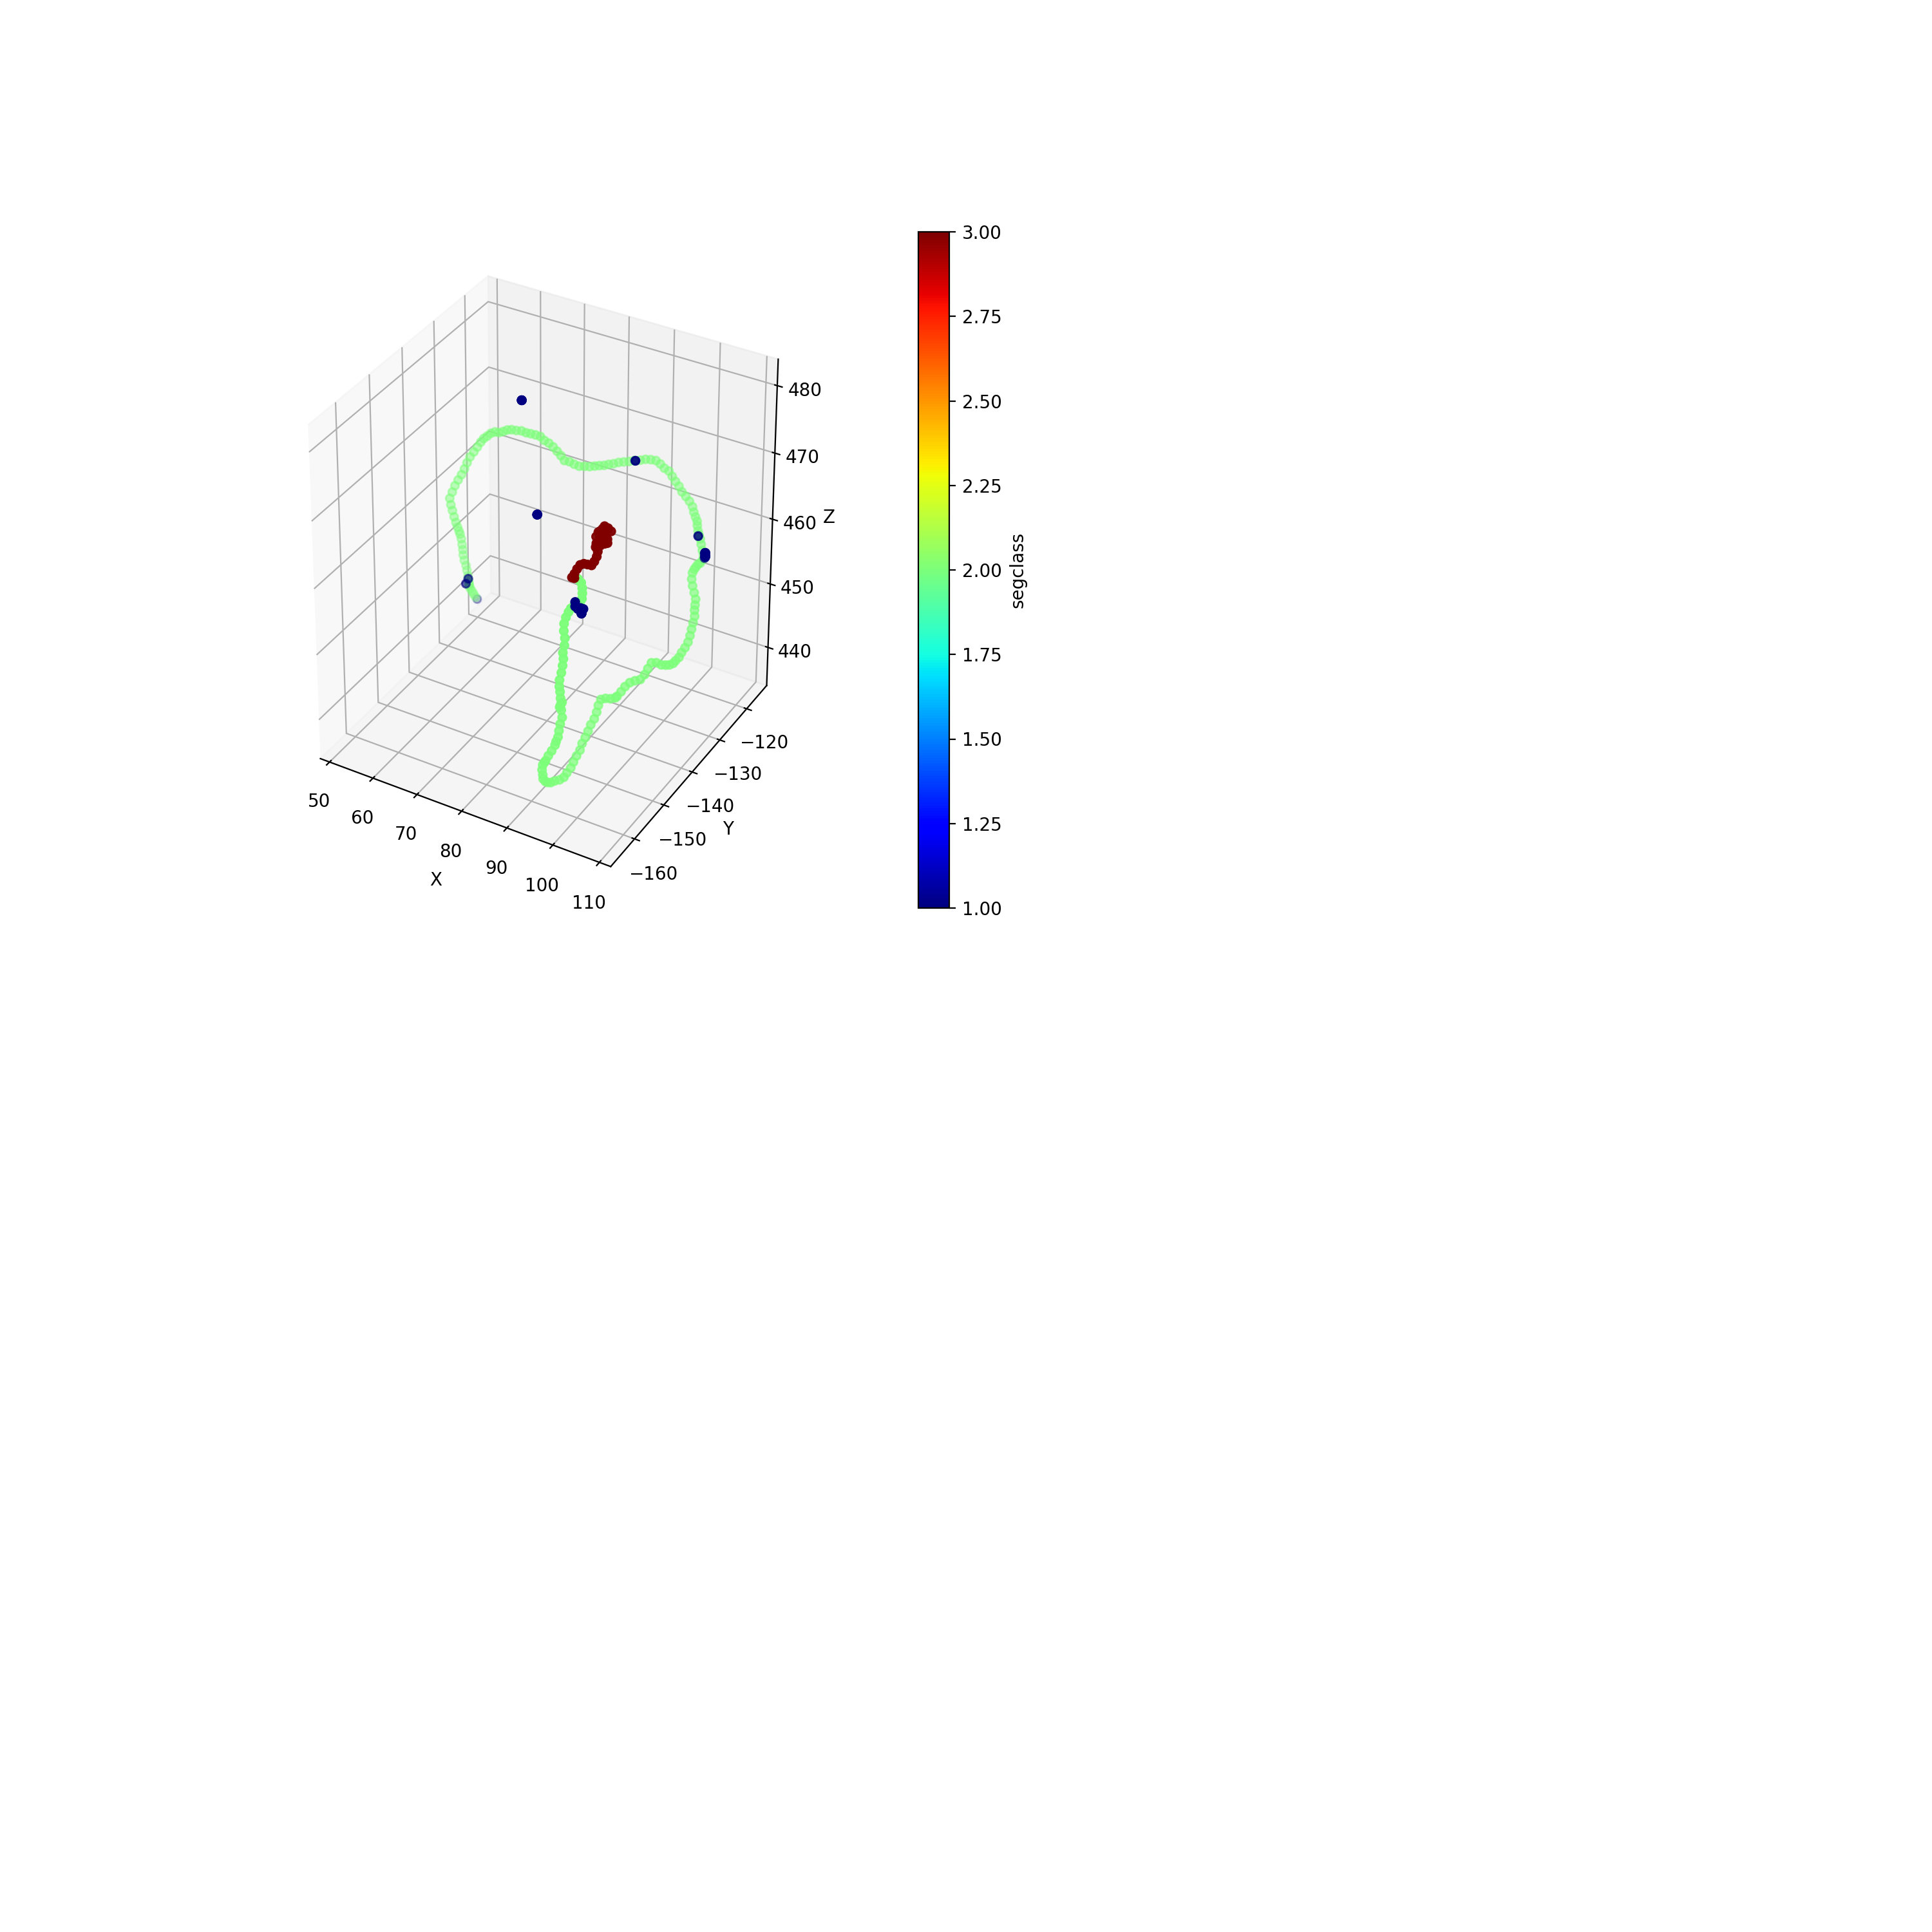

<IPython.core.display.Javascript object>


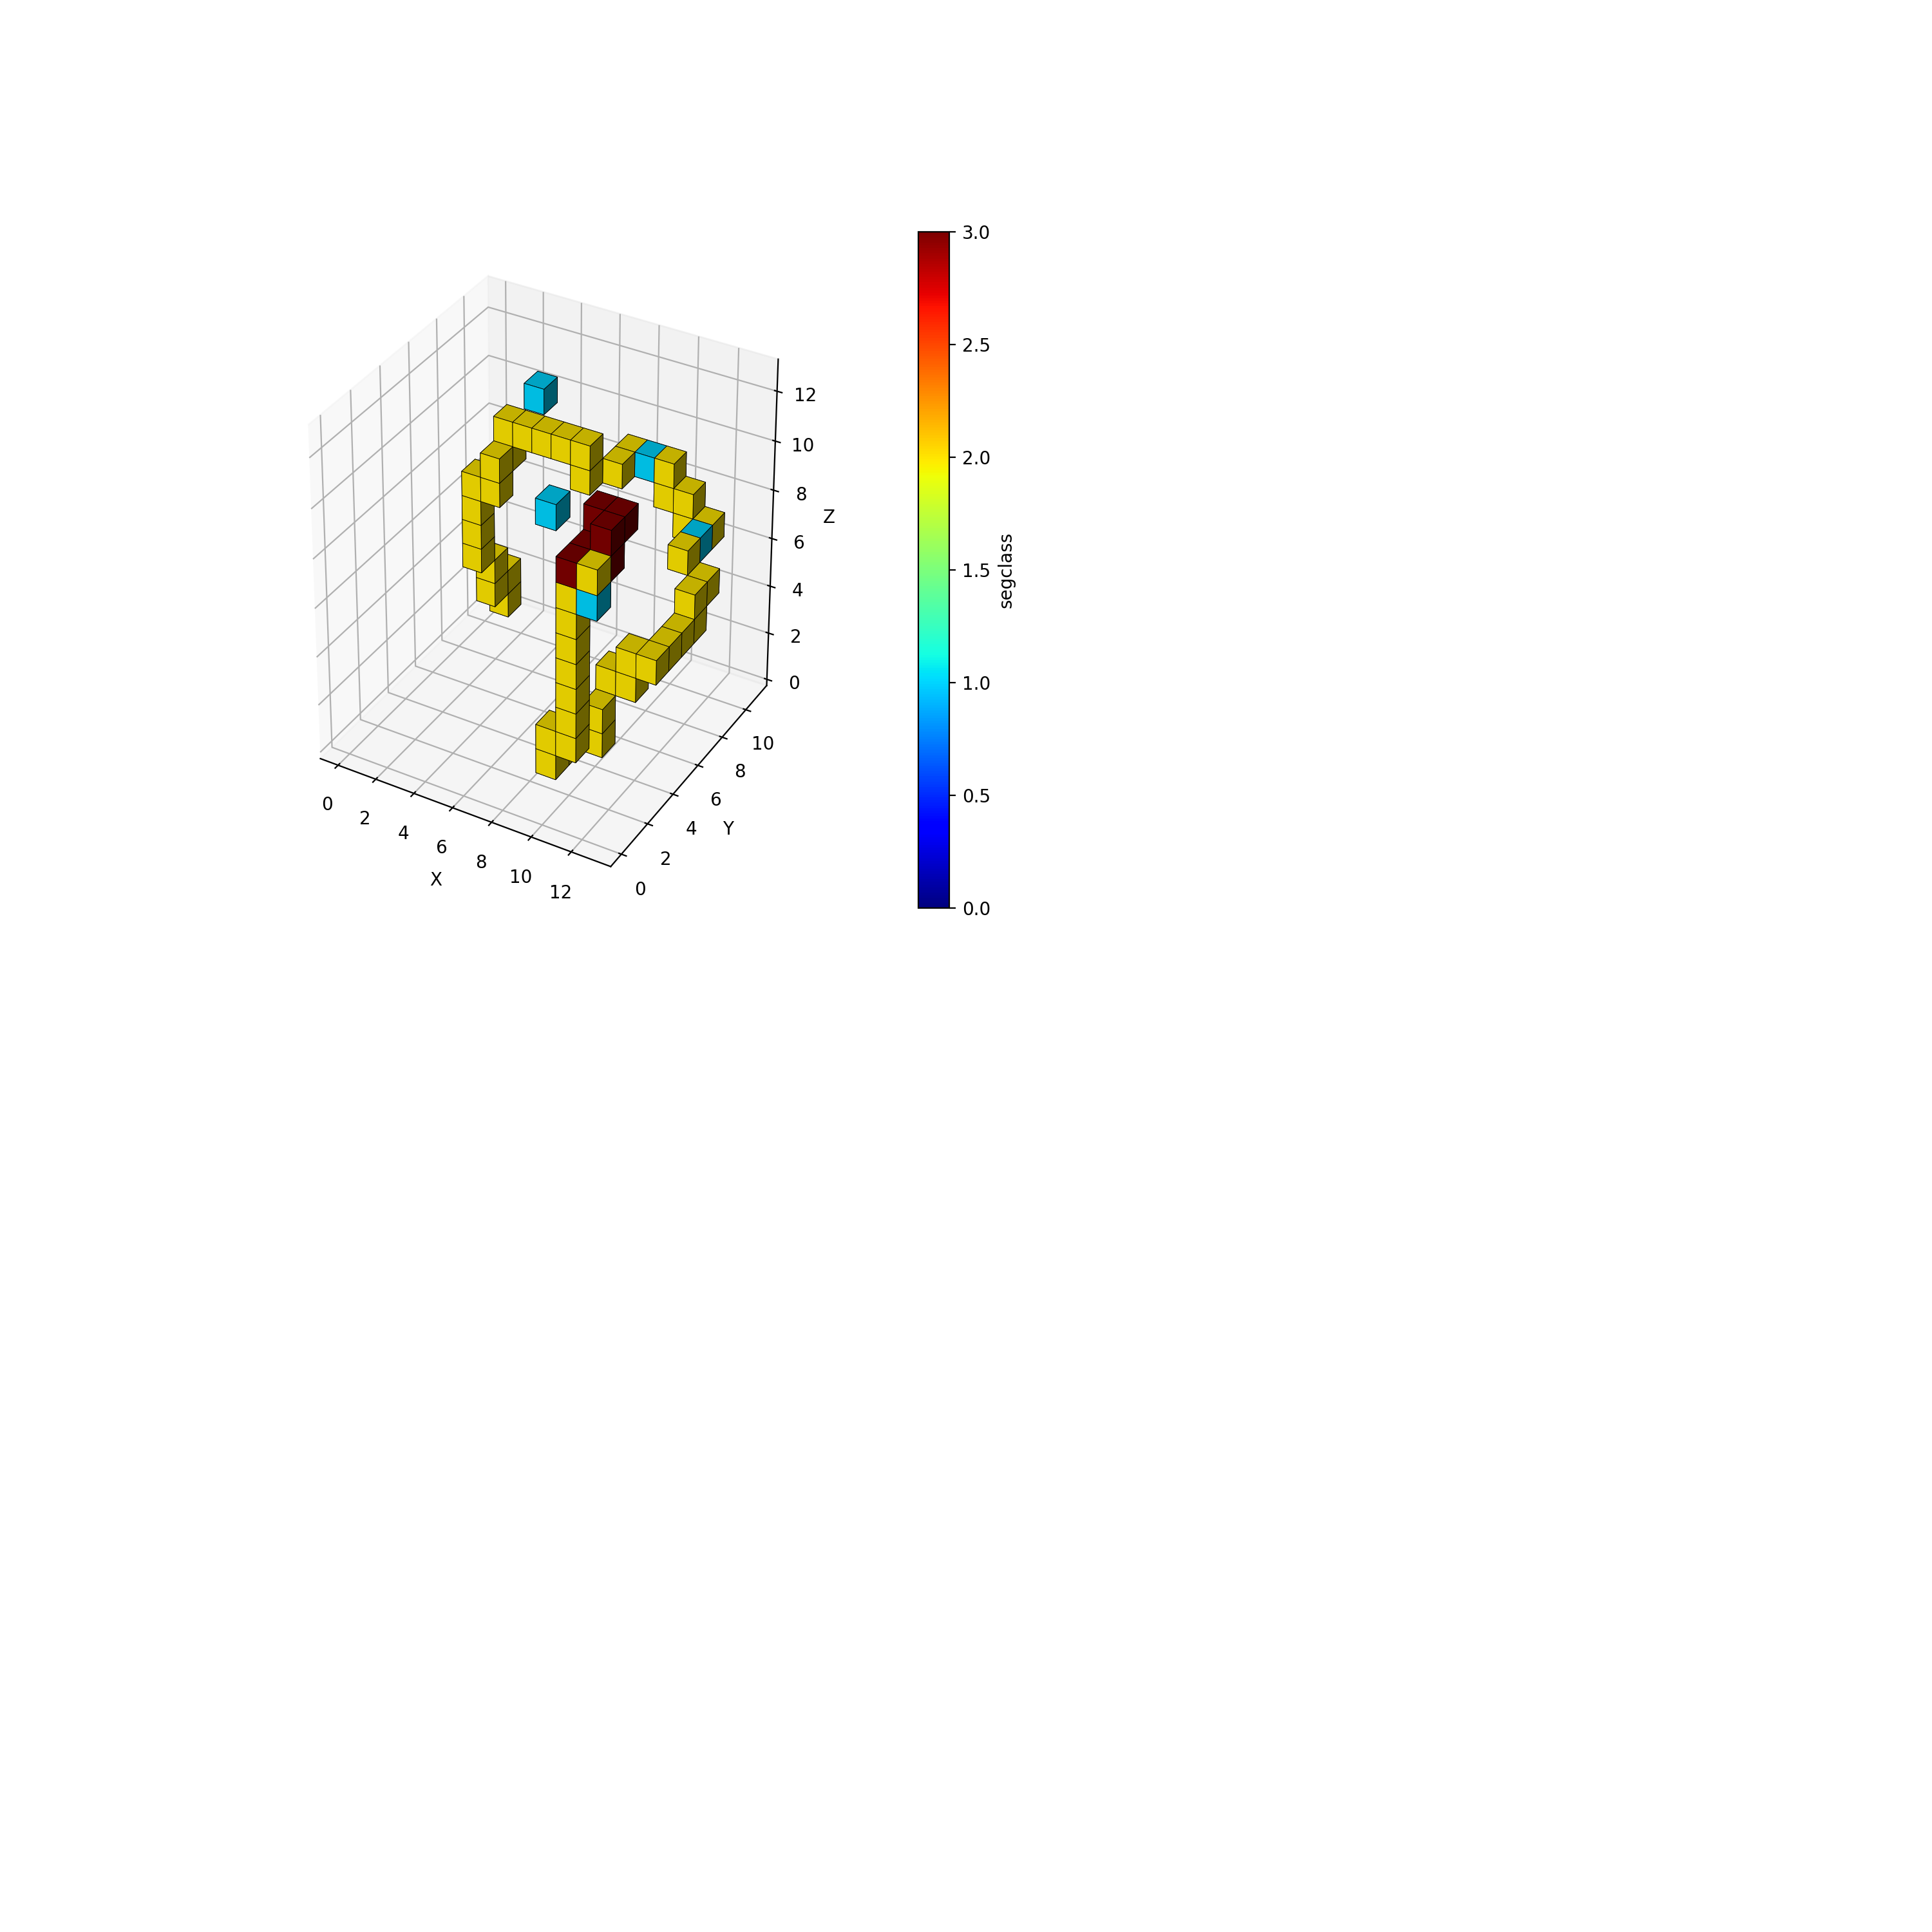

<IPython.core.display.Javascript object>


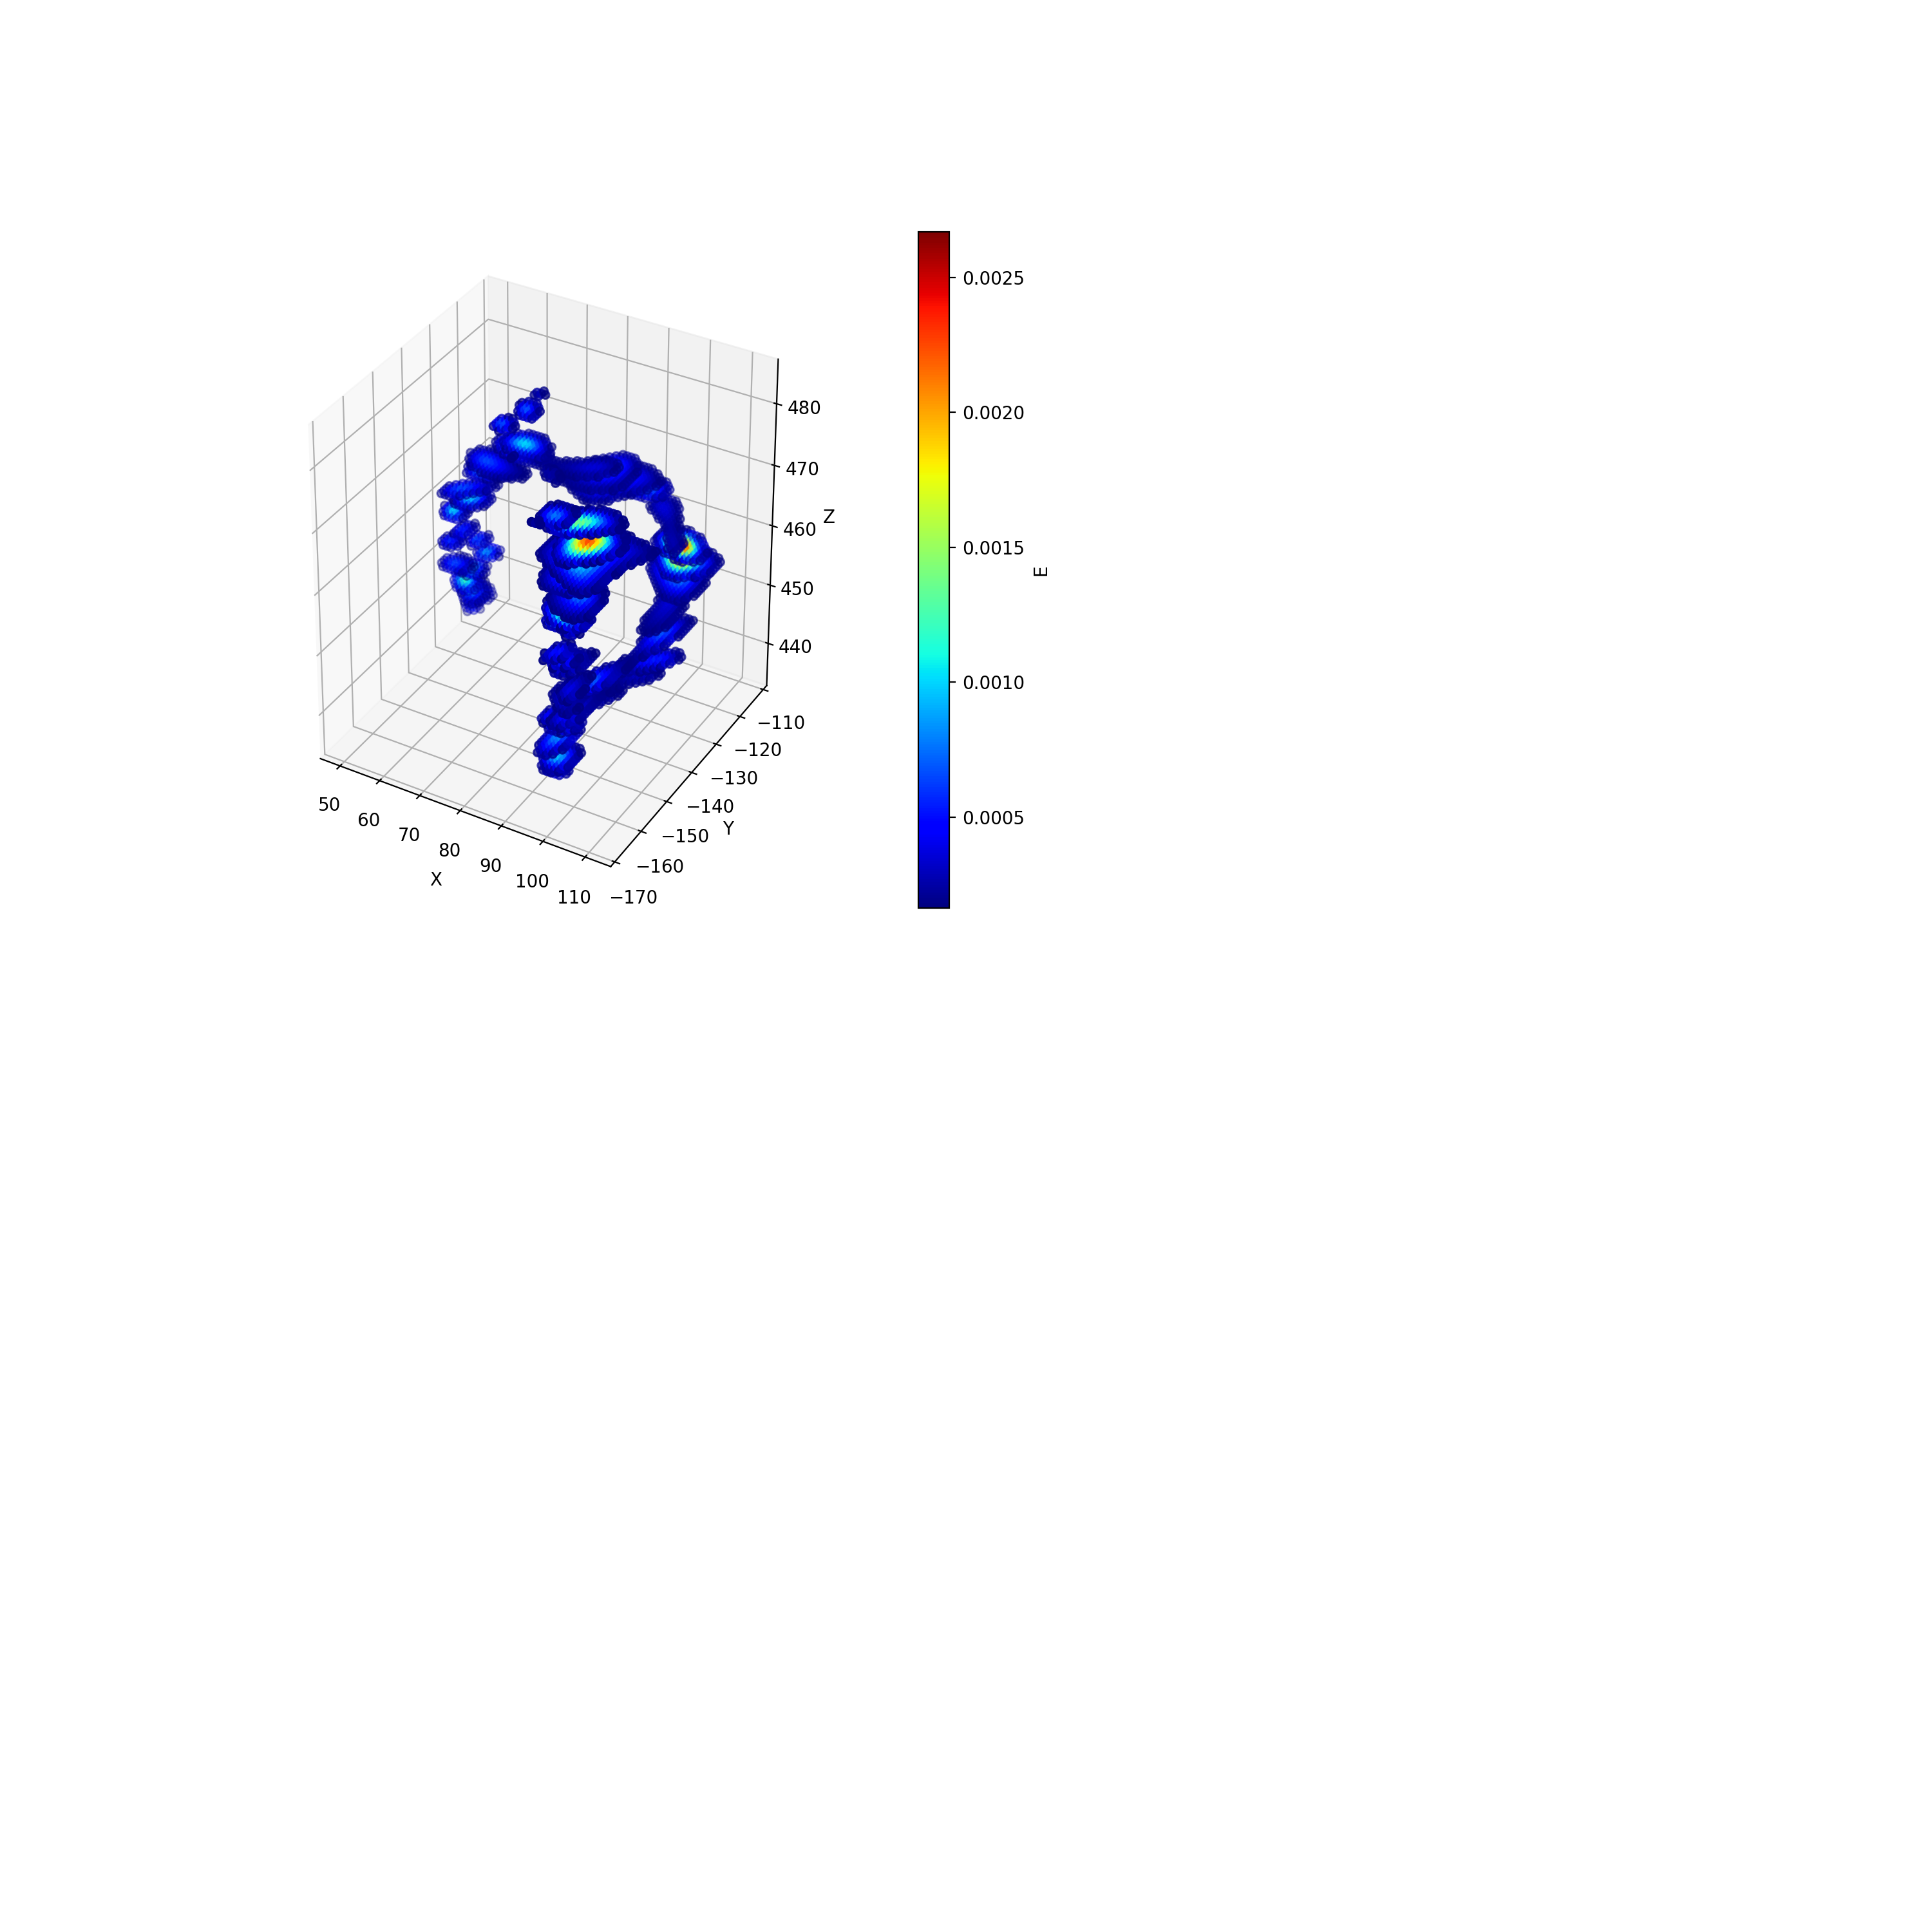

<IPython.core.display.Javascript object>


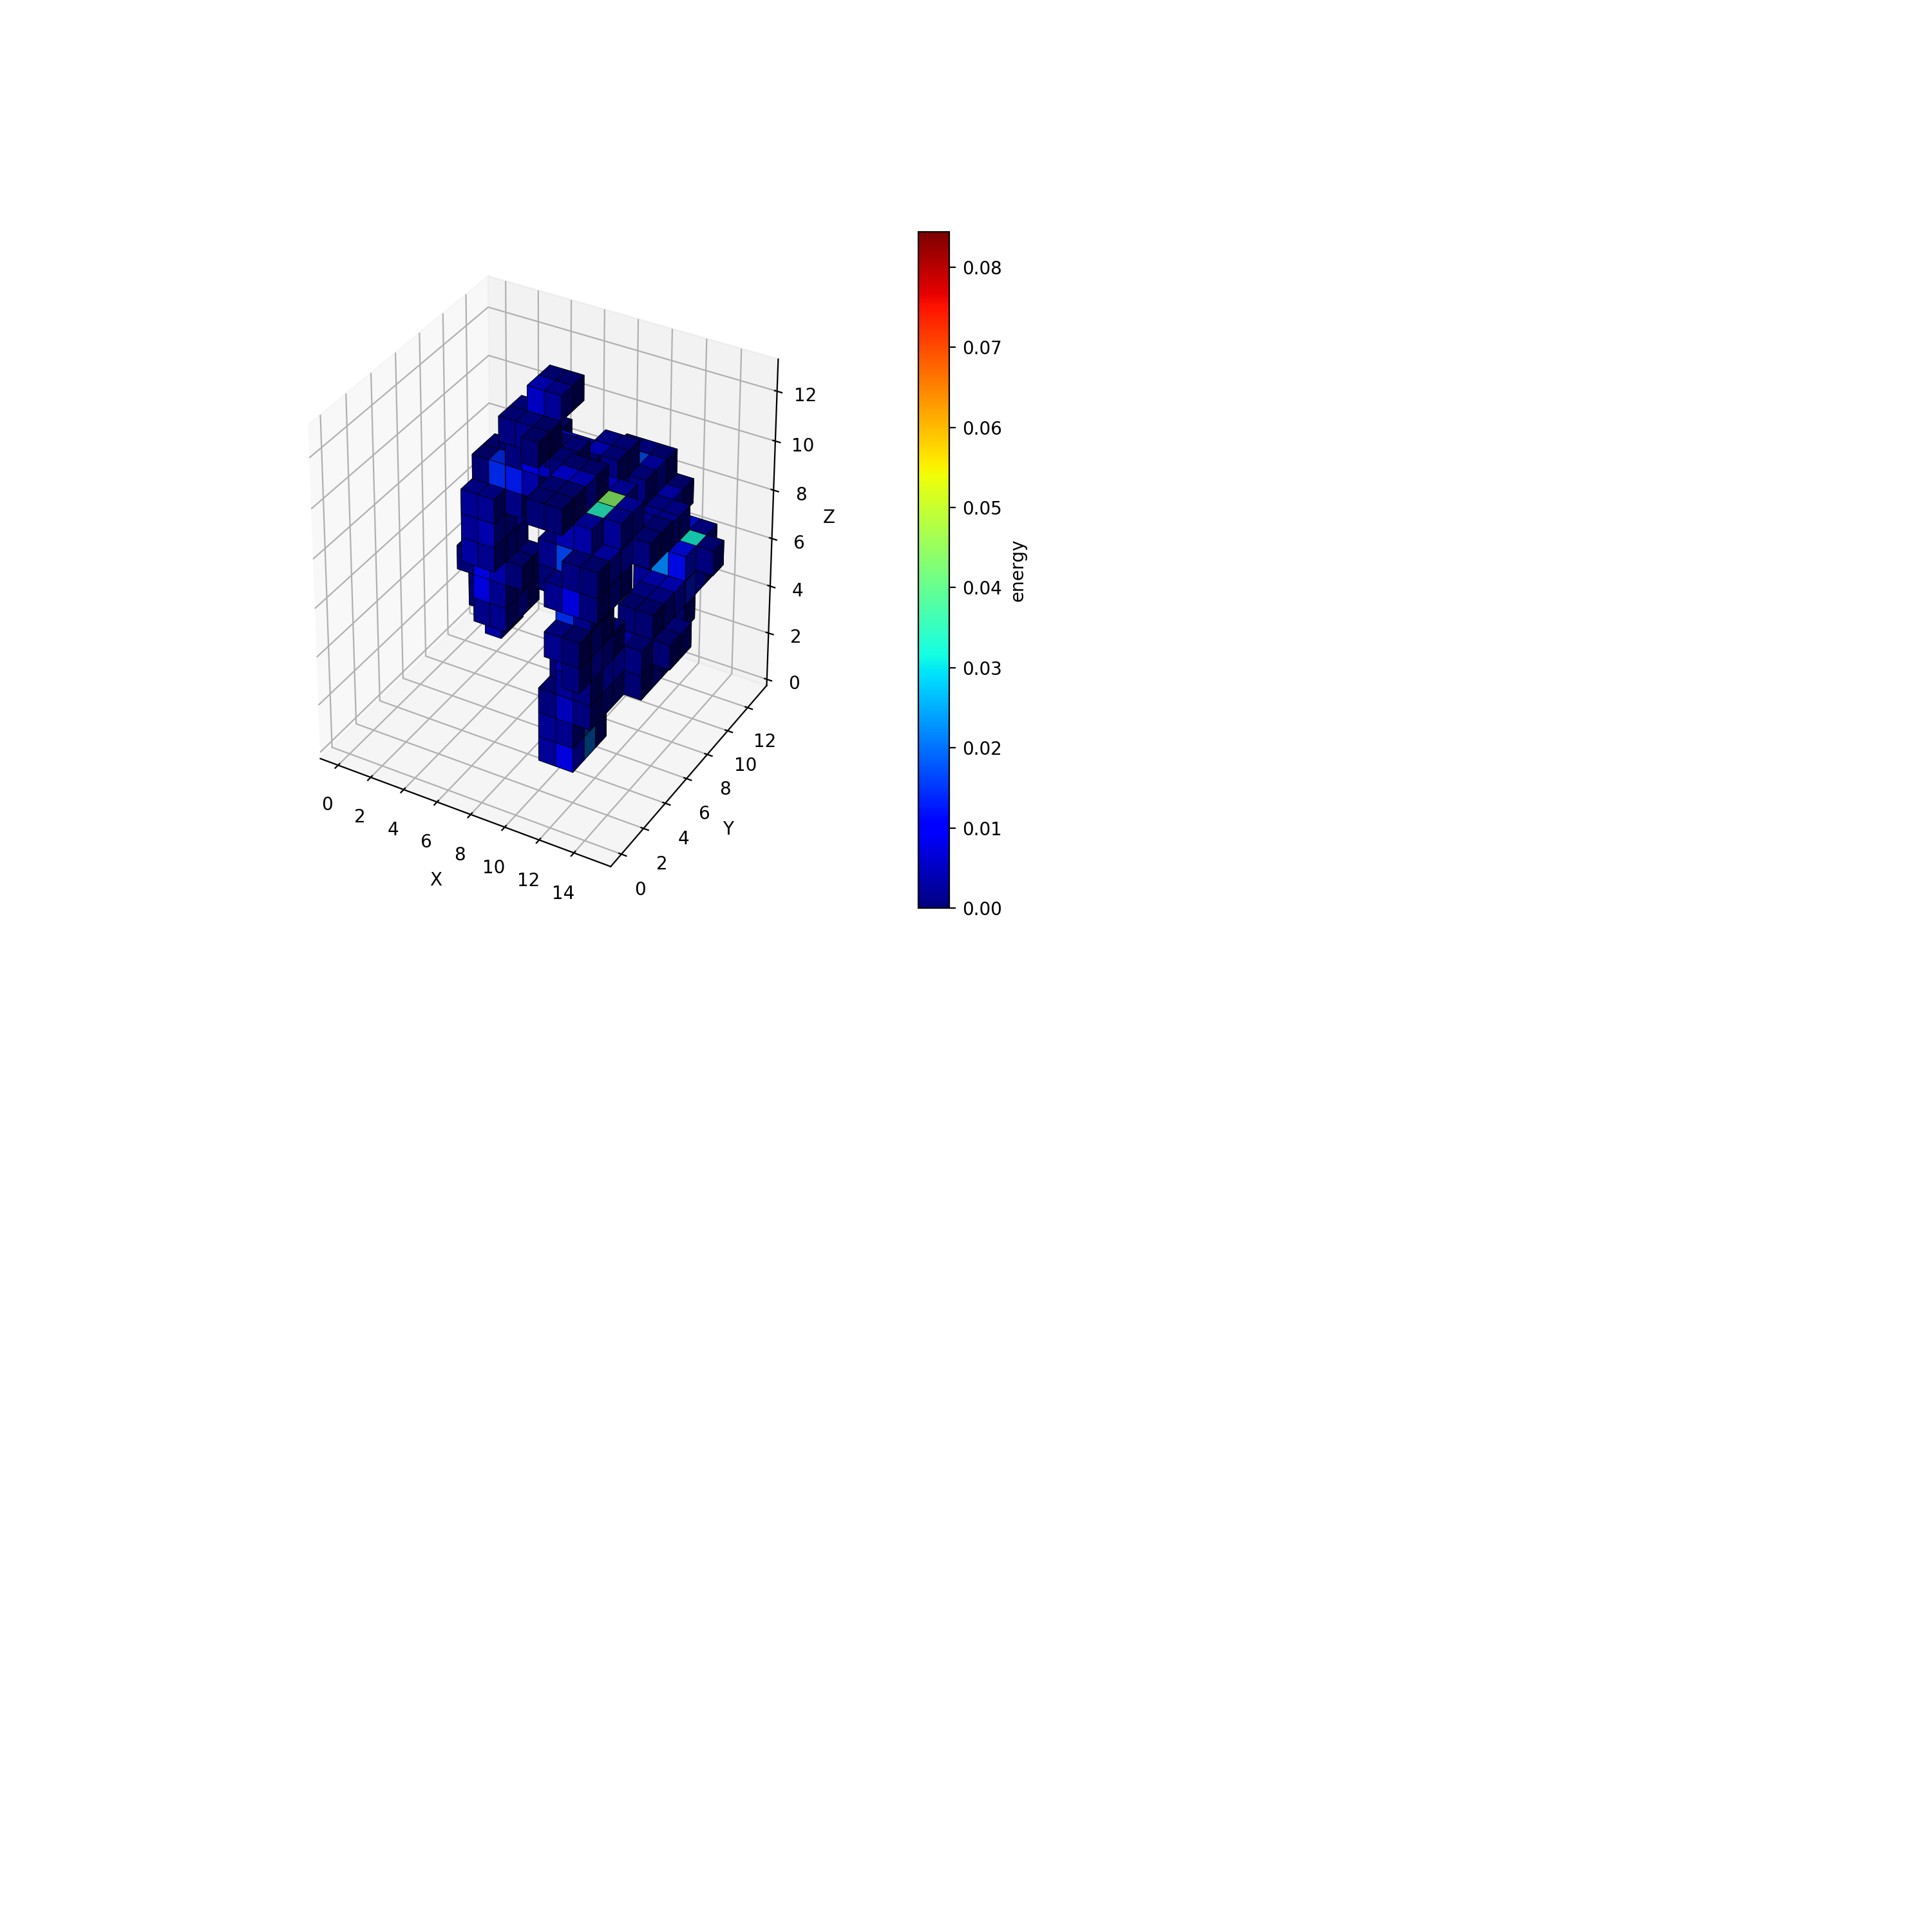

<IPython.core.display.Javascript object>


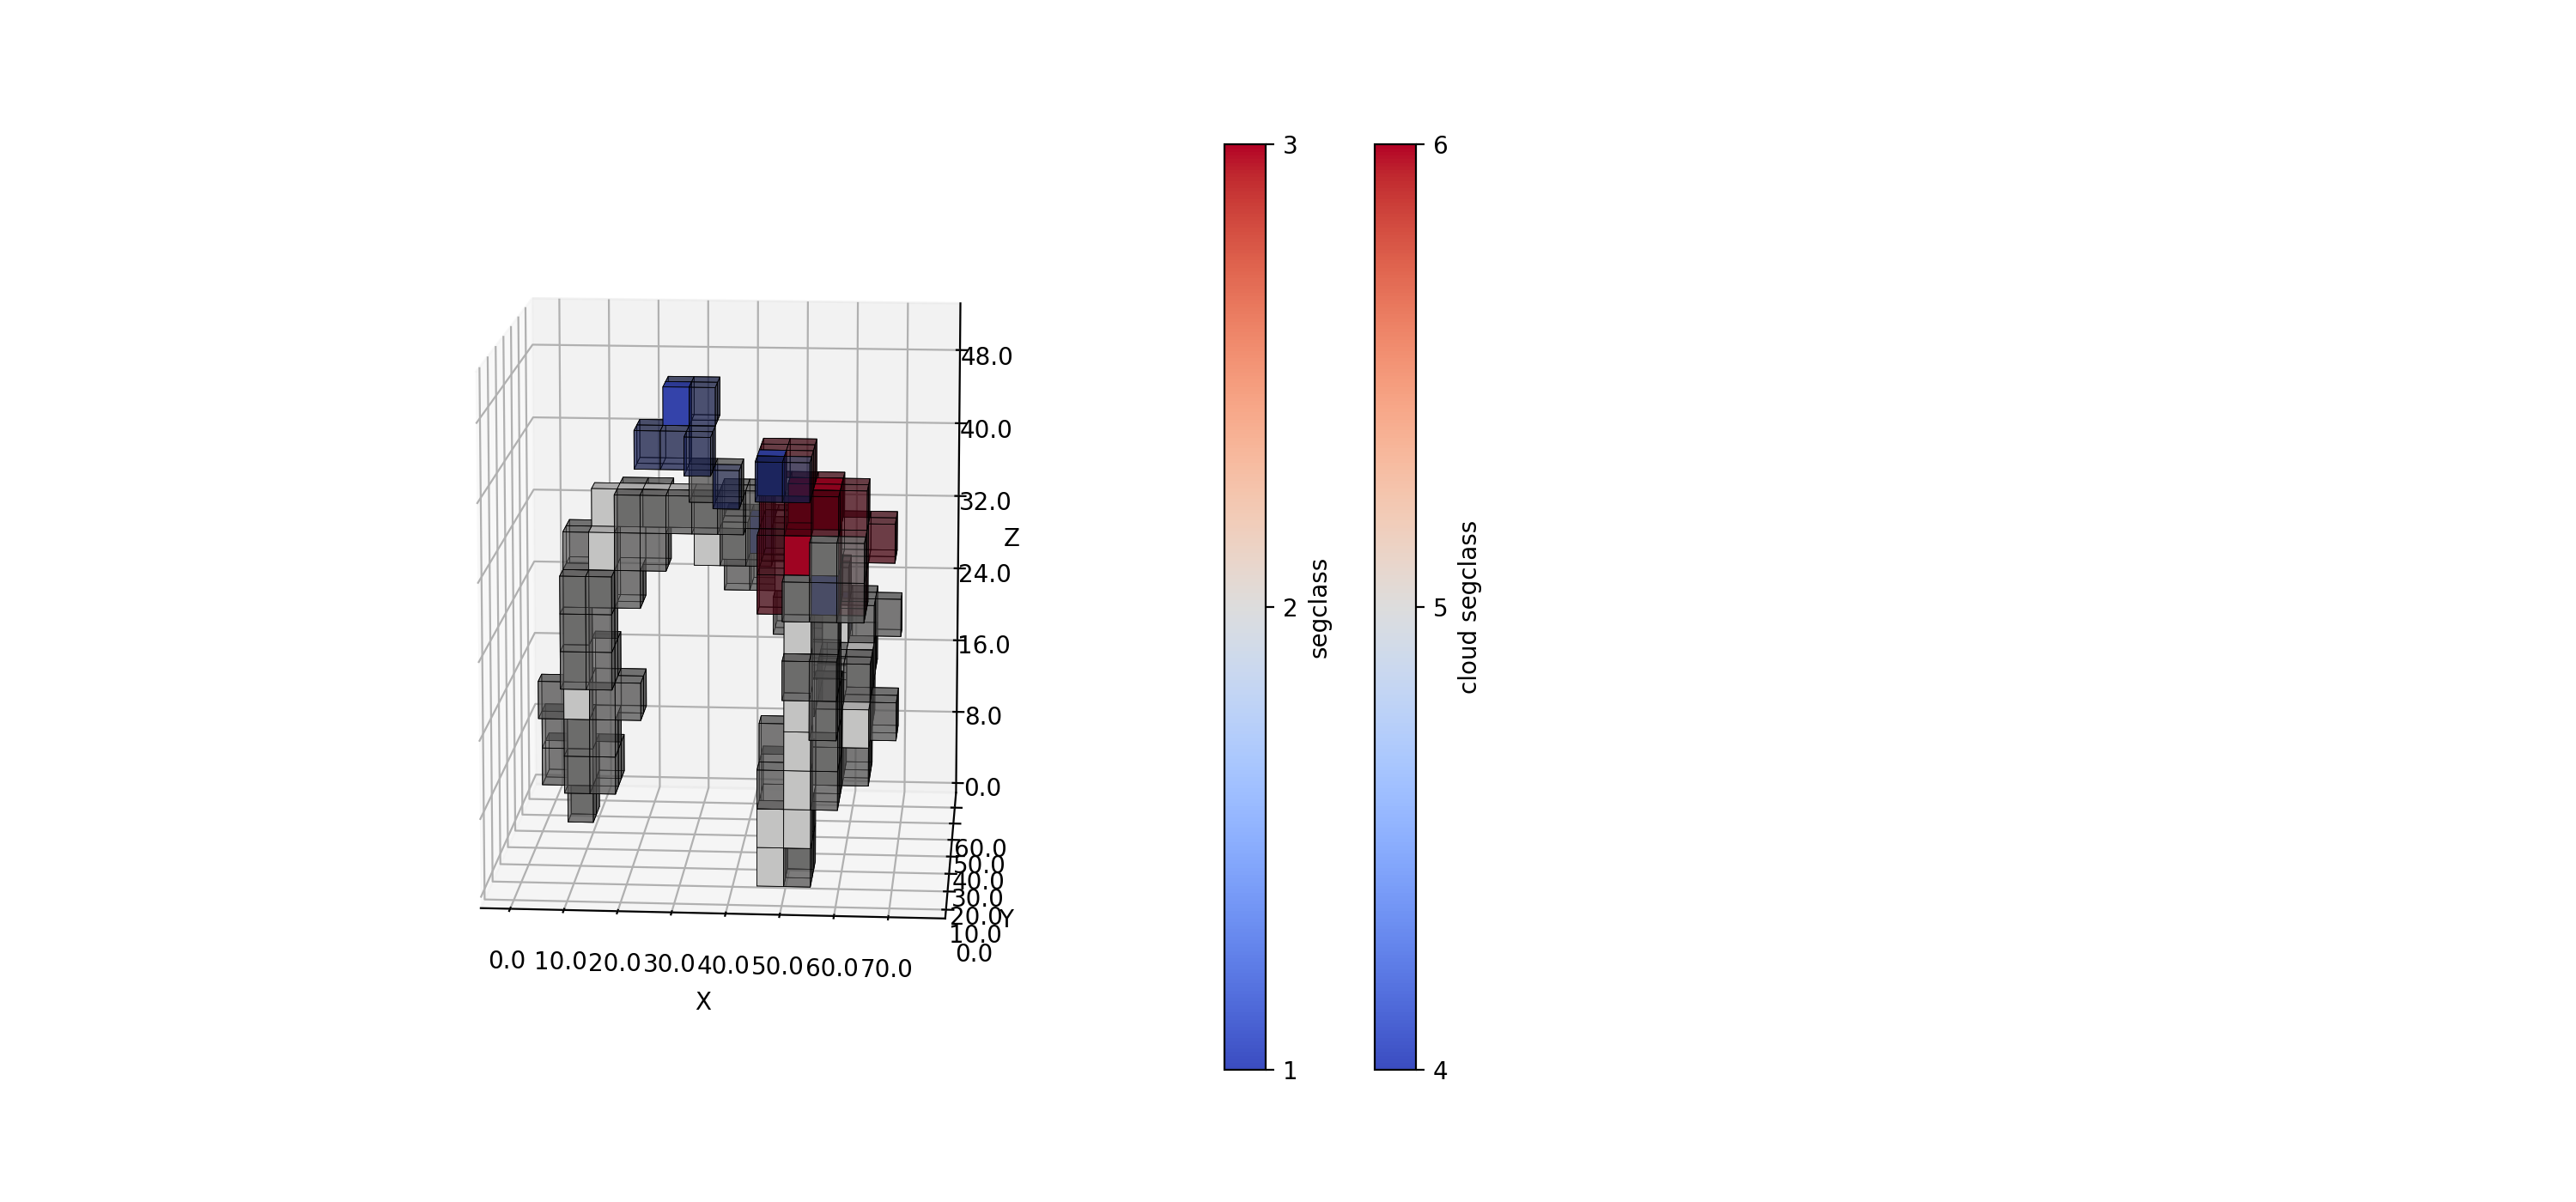

<IPython.core.display.Javascript object>


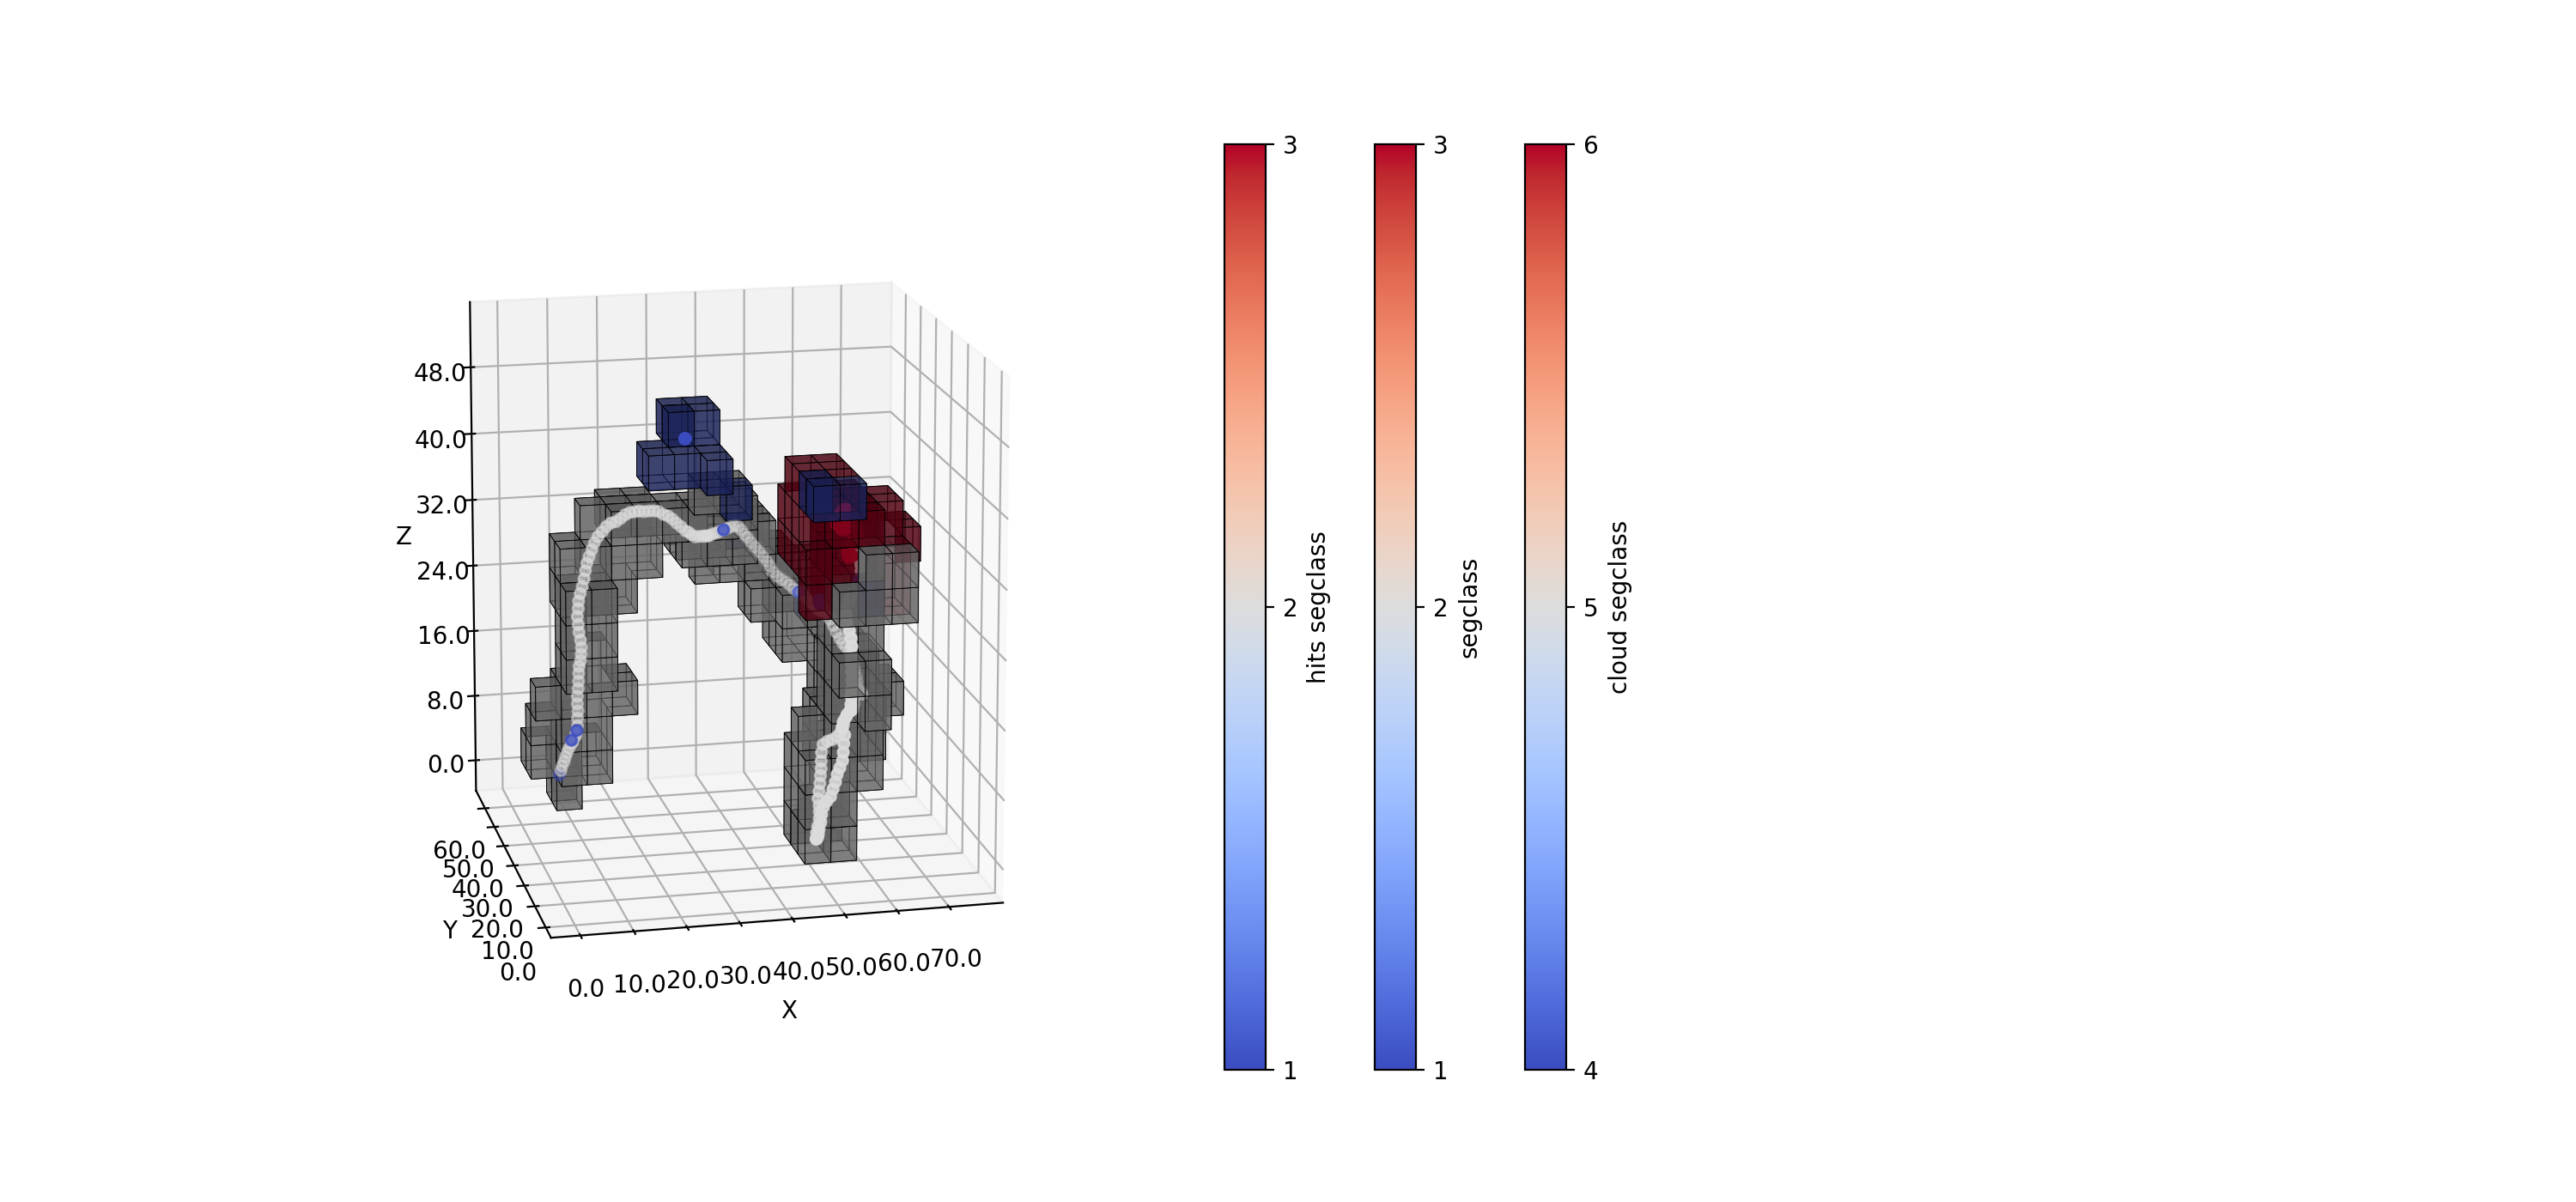

In [21]:
%matplotlib notebook

plot_3d_hits(event_MC_hits, value = 'segclass') 
plot_3d_vox(event_MC_vox, value = 'segclass')
#plot_3d_hits(event_MC_hits, value = 'energy')
plot_3d_hits(event_beersh_hits, value = 'E', coords = ['X', 'Y', 'Z'])
plot_3d_vox(event_beersh_vox, value = 'energy', coords = ['xbin', 'ybin', 'zbin'])
plot_cloud_voxels(event_beersh_vox, voxel_size, opacity = [1, 0.5])
plot_cloud_voxels_and_hits(event_beersh_vox, event_MC_hits, voxel_size, opacity = [0.6, 0.6])


In [34]:
origi_voxels = labelled_beersheba_voxels[np.isin(labelled_beersheba_voxels.segclass, (1, 2, 3))]
neigh_voxels = labelled_beersheba_voxels[np.isin(labelled_beersheba_voxels.segclass, (4, 5, 6))]
ghost_voxels = labelled_beersheba_voxels[np.isin(labelled_beersheba_voxels.segclass, 7)]

In [36]:
len(origi_voxels) / len(labelled_beersheba_voxels), len(neigh_voxels) / len(labelled_beersheba_voxels), len(ghost_voxels) / len(labelled_beersheba_voxels)


(0.2765049089446496, 0.7162810907904387, 0.007214000264911788)

<IPython.core.display.Javascript object>


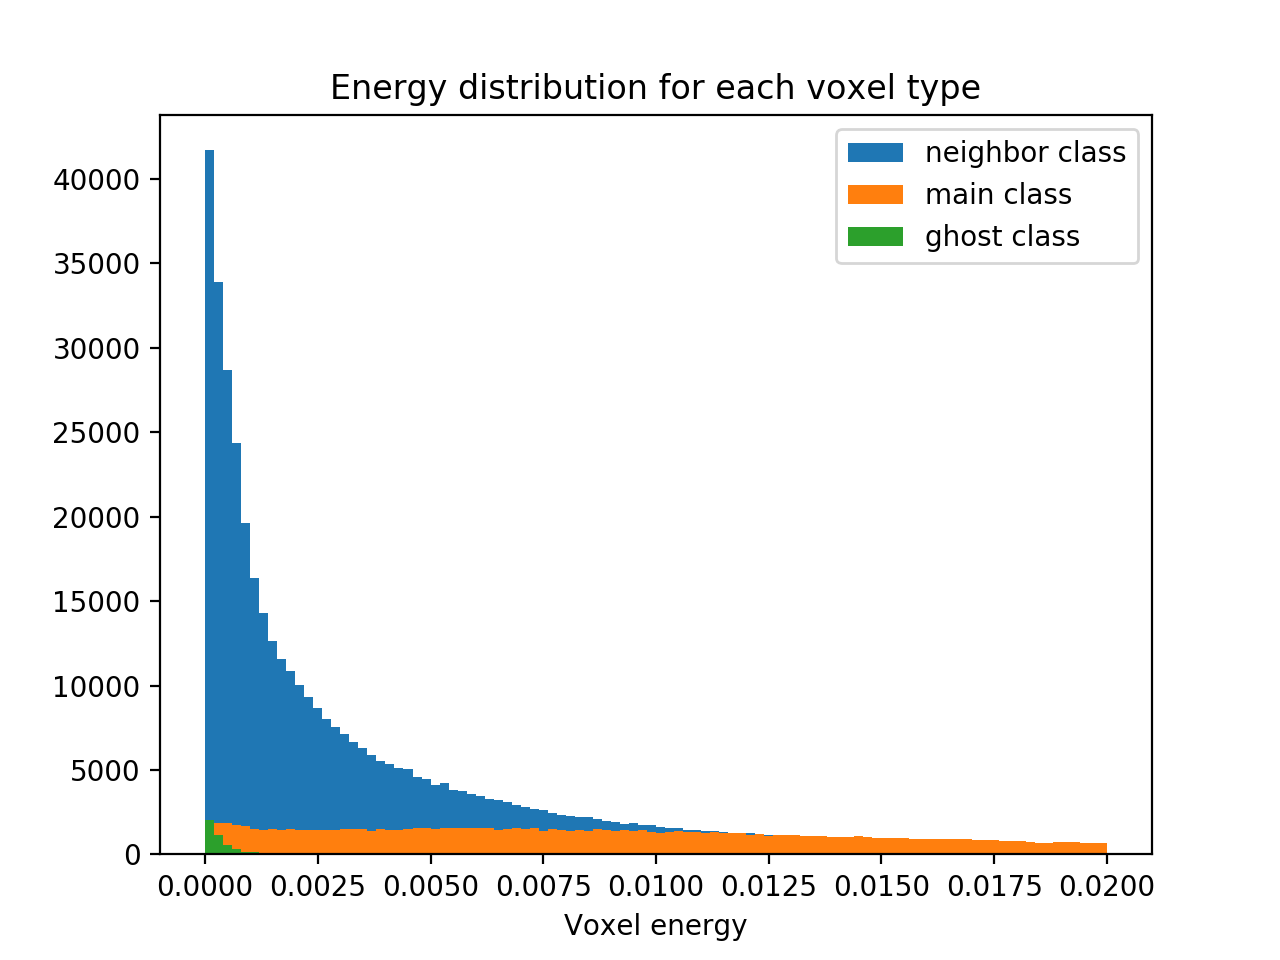

In [37]:
%matplotlib notebook
plt.hist(neigh_voxels.energy, bins = 100, range = (0, 0.02), label = 'neighbor class')
plt.hist(origi_voxels.energy, bins = 100, range = (0, 0.02), label = 'main class')
plt.hist(ghost_voxels.energy, bins = 100, range = (0, 0.02), label = 'ghost class')
plt.title('Energy distribution for each voxel type')
plt.xlabel('Voxel energy')
plt.legend()

plt.show()


<IPython.core.display.Javascript object>


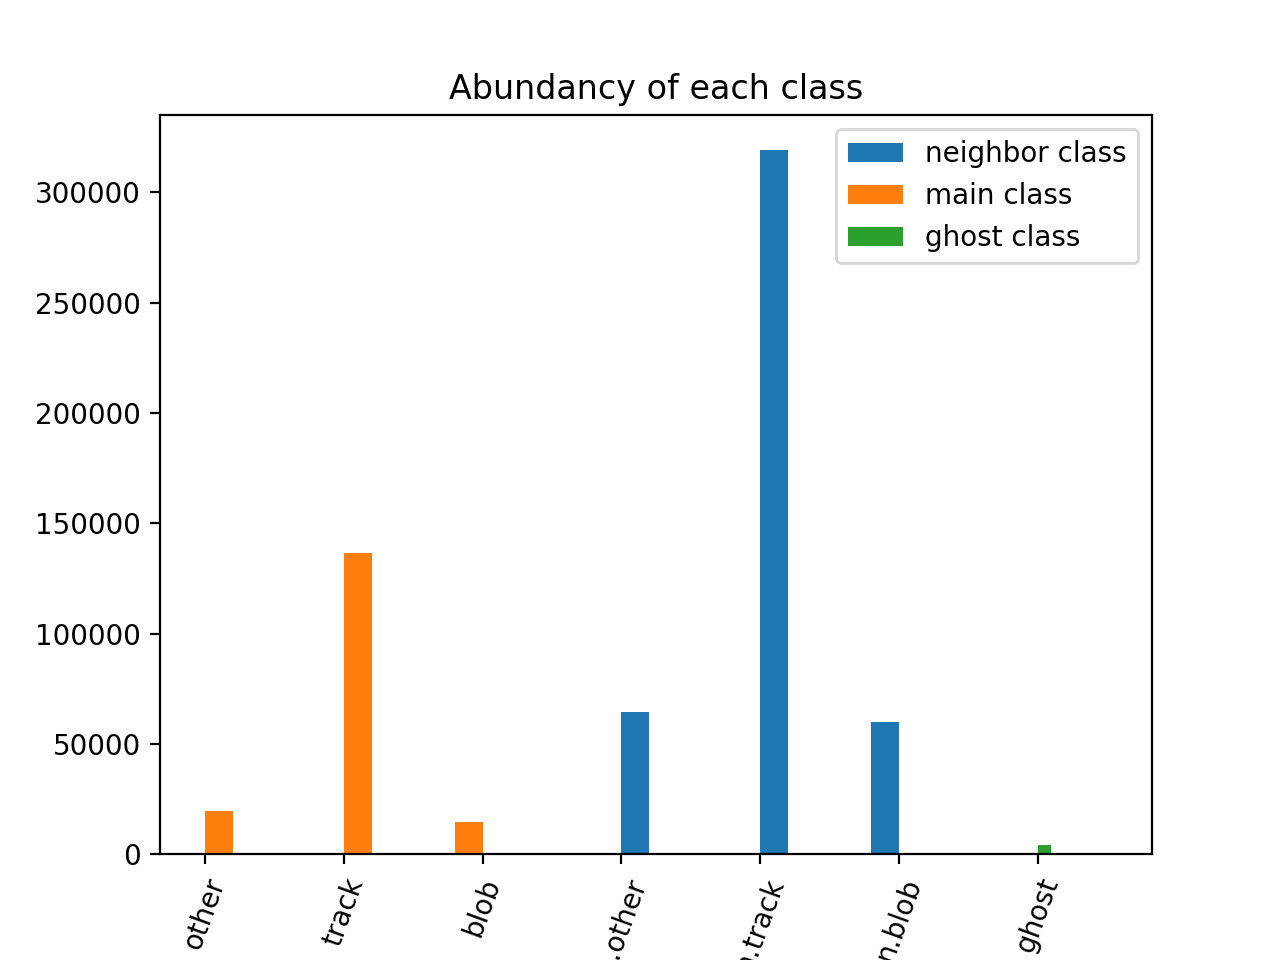

In [38]:
%matplotlib notebook
plt.hist(neigh_voxels.segclass, label = 'neighbor class')
plt.hist(origi_voxels.segclass, label = 'main class')
plt.hist(ghost_voxels.segclass, label = 'ghost class')
plt.title('Abundancy of each class')
plt.xticks(ticks = [1, 2, 3, 4, 5, 6, 7], 
           labels = ['other', 'track', 'blob', 'n.other', 'n.track', 'n.blob', 'ghost'], 
           rotation = 70)
plt.legend()
plt.show()

In [39]:
origi_abund = np.histogram(origi_voxels.segclass, bins = 3)[0]
neigh_abund = np.histogram(neigh_voxels.segclass, bins = 3)[0]
ghost_abund = np.histogram(ghost_voxels.segclass, bins = 3)[0]

In [40]:
print('Ratio track/other MC', origi_abund[1]/origi_abund[0], 'vs neighbours', neigh_abund[1]/neigh_abund[0])
print('Ratio track/blob MC',  origi_abund[1]/origi_abund[2], 'vs neighbours', neigh_abund[1]/neigh_abund[2])
print('Ratio other/blob MC',  origi_abund[0]/origi_abund[2], 'vs neighbours', neigh_abund[0]/neigh_abund[2])

Ratio track/other MC 6.908005866585748 vs neighbours 4.950114856894518
Ratio track/blob MC 9.221712125303808 vs neighbours 5.308620603558766
Ratio other/blob MC 1.334931136916014 vs neighbours 1.0724237228889593


<IPython.core.display.Javascript object>


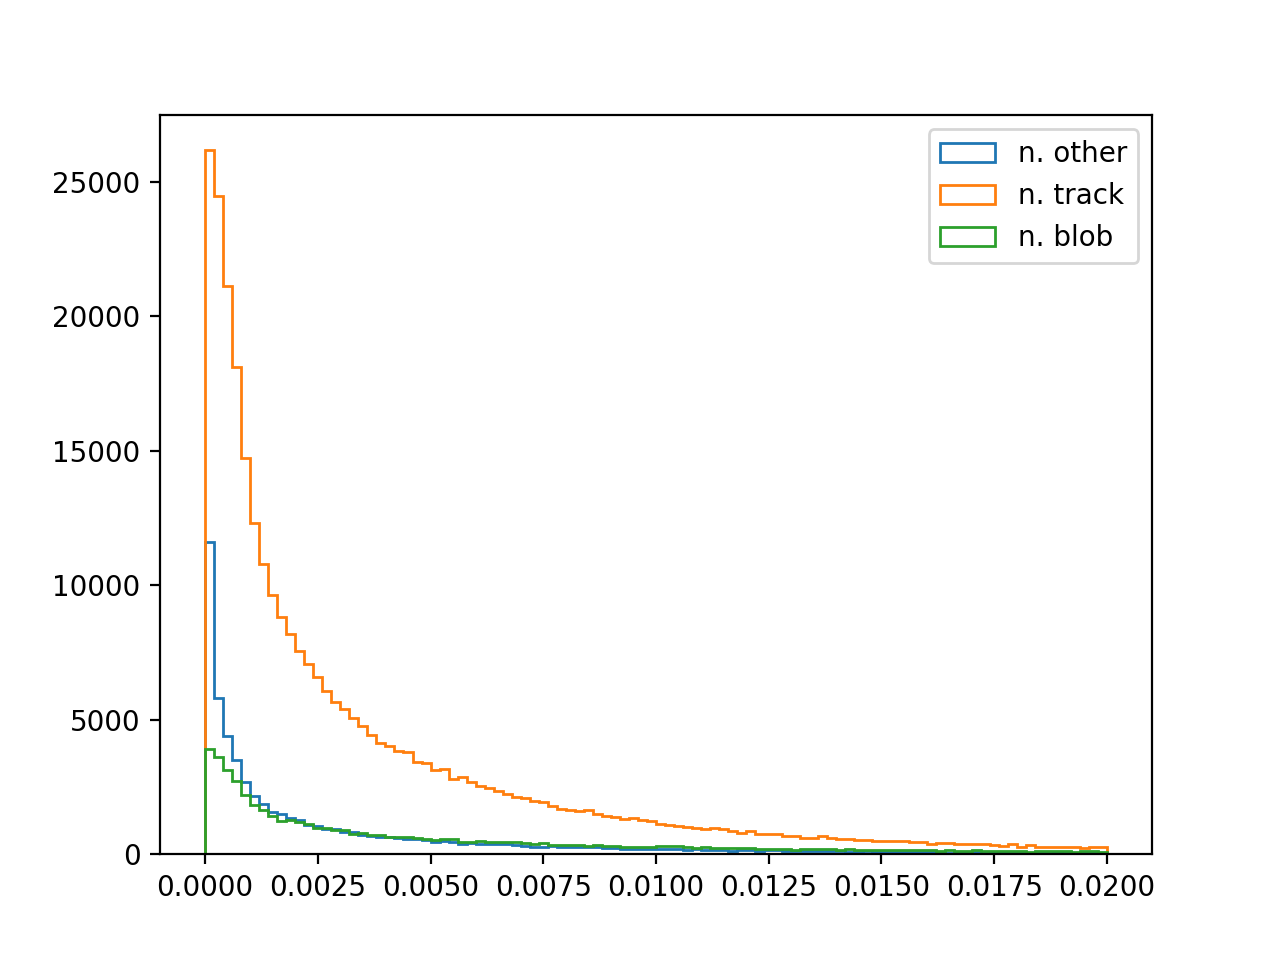

In [41]:
%matplotlib notebook
plt.hist(neigh_voxels[neigh_voxels.segclass == 4].energy, bins = 100, range = (0, 0.02), histtype = 'step', label = 'n. other')
plt.hist(neigh_voxels[neigh_voxels.segclass == 5].energy, bins = 100, range = (0, 0.02), histtype = 'step', label = 'n. track')
plt.hist(neigh_voxels[neigh_voxels.segclass == 6].energy, bins = 100, range = (0, 0.02), histtype = 'step', label = 'n. blob')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


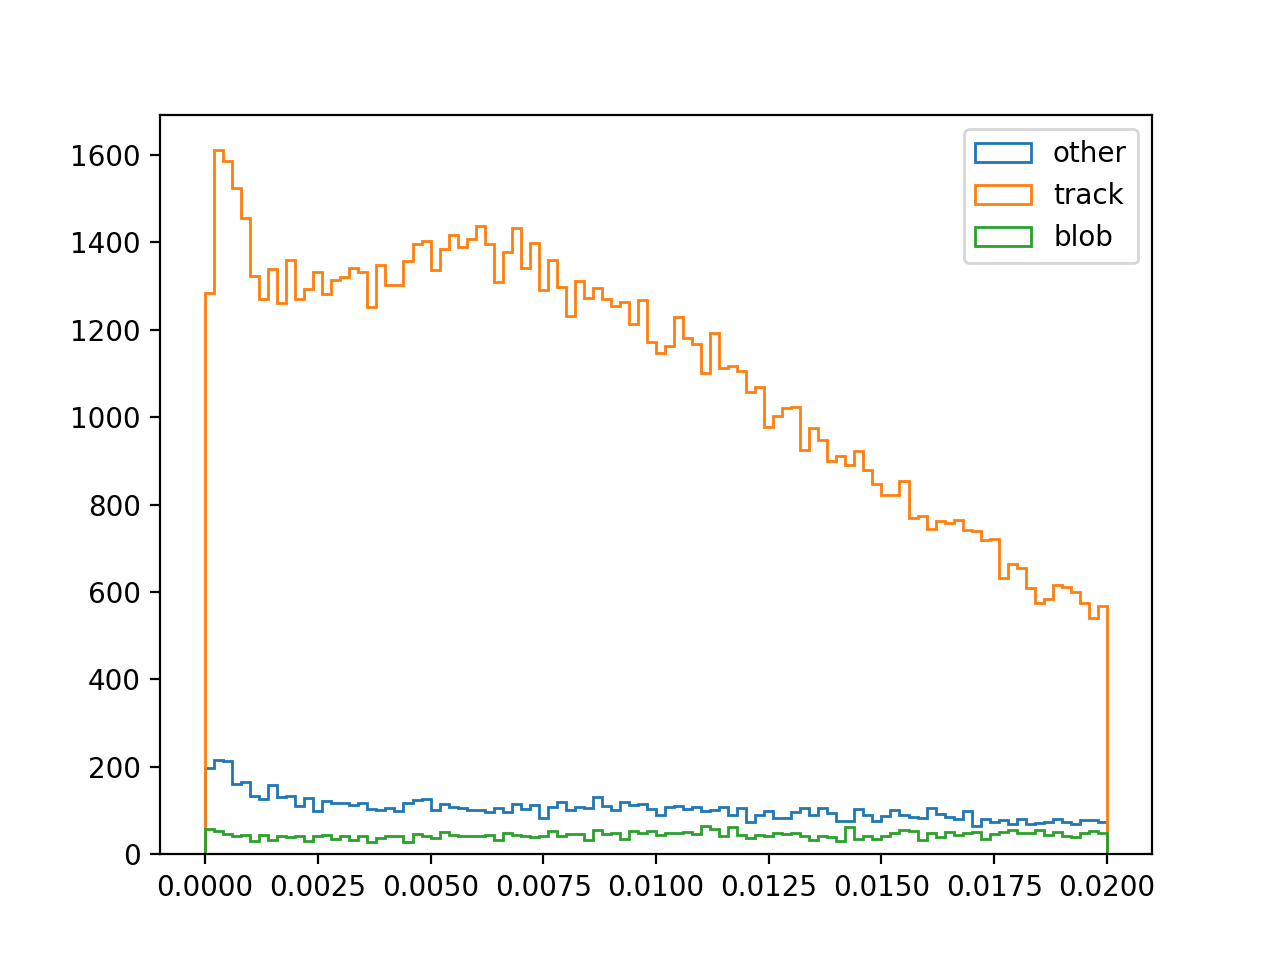

In [42]:
%matplotlib notebook
plt.hist(origi_voxels[origi_voxels.segclass == 1].energy, bins = 100, range = (0, 0.02), histtype = 'step', label = 'other')
plt.hist(origi_voxels[origi_voxels.segclass == 2].energy, bins = 100, range = (0, 0.02), histtype = 'step', label = 'track')
plt.hist(origi_voxels[origi_voxels.segclass == 3].energy, bins = 100, range = (0, 0.02), histtype = 'step', label = 'blob')
plt.legend()
plt.show()

Maomenos son unos ratios con sentido etc...

Ahora con más estadística (son los voxeles de todo un cut, unos ~3000 eventos)

In [17]:
labelled_cut = '/Users/mperez/NEXT/data_labelling/examples/prueba_cut24_all_2mm.h5'

In [18]:
labelled_MC_voxels_all = dio.load_dst(labelled_cut, 'DATASET', 'MCVoxels')
labelled_MC_hits_all   = dio.load_dst(labelled_cut, 'DATASET', 'MCHits')
labelled_beersheba_all = dio.load_dst(labelled_cut, 'DATASET', 'BeershebaVoxels')
eventInfo_all = dio.load_dst(labelled_cut, 'DATASET', 'EventsInfo')
binsInfo_all  = dio.load_dst(labelled_cut, 'DATASET', 'BinsInfo')
binsInfo_all = binsInfo_all.drop(np.arange(1, len(binsInfo_all), 1), axis = 0)

In [19]:
origi_voxels_all = labelled_beersheba_all[np.isin(labelled_beersheba_all.segclass, (1, 2, 3))]
neigh_voxels_all = labelled_beersheba_all[np.isin(labelled_beersheba_all.segclass, (4, 5, 6))]
ghost_voxels_all = labelled_beersheba_all[np.isin(labelled_beersheba_all.segclass, 7)]

In [20]:
len(origi_voxels_all) / len(labelled_beersheba_all), len(neigh_voxels_all) / len(labelled_beersheba_all), len(ghost_voxels_all) / len(labelled_beersheba_all)

(0.2603617822287233, 0.7338864558377605, 0.005751761933516303)

<IPython.core.display.Javascript object>


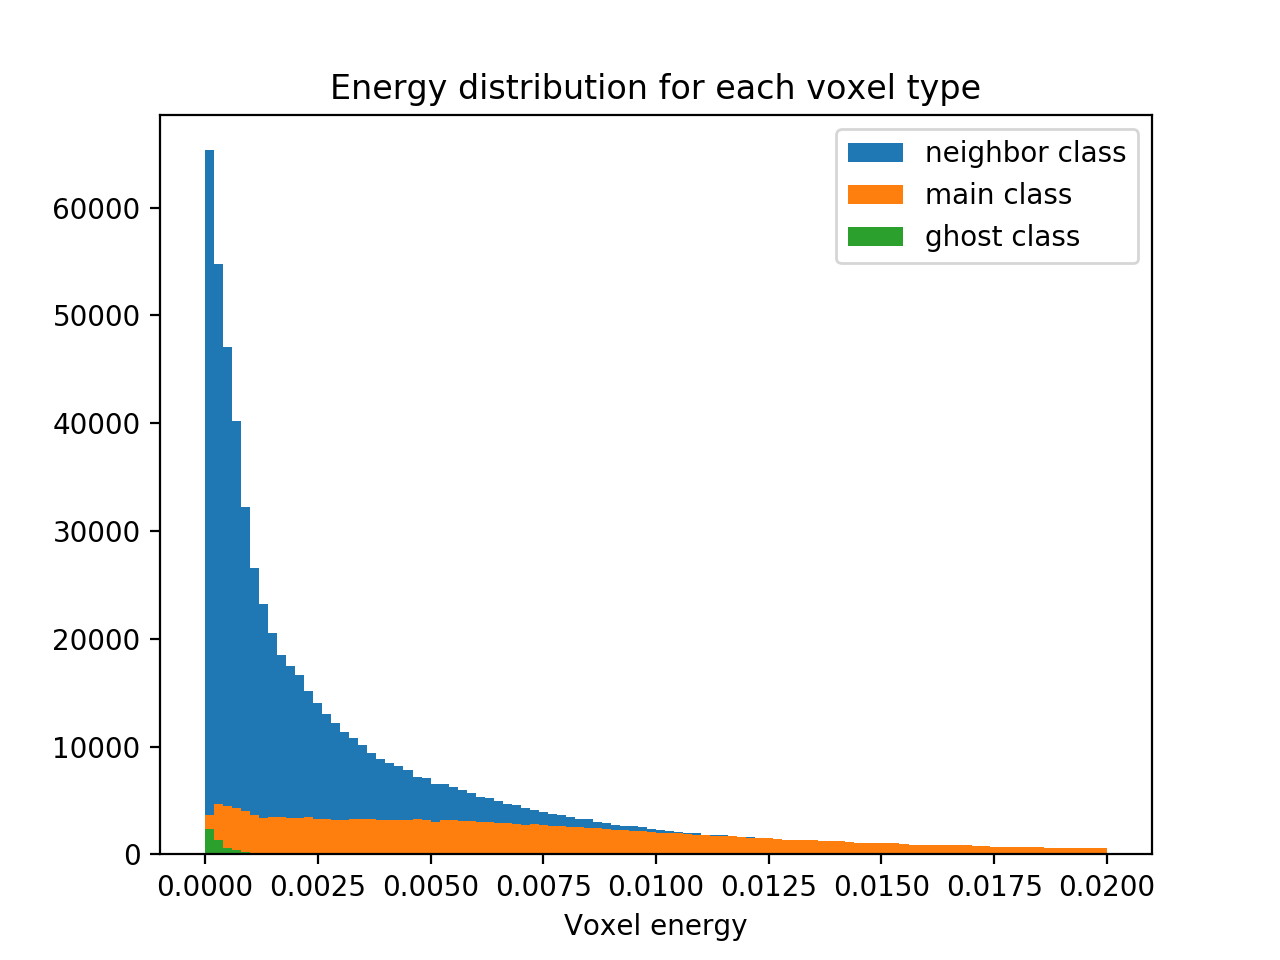

In [21]:
%matplotlib notebook
plt.hist(neigh_voxels_all.energy, bins = 100, range = (0, 0.02), label = 'neighbor class')
plt.hist(origi_voxels_all.energy, bins = 100, range = (0, 0.02), label = 'main class')
plt.hist(ghost_voxels_all.energy, bins = 100, range = (0, 0.02), label = 'ghost class')
plt.title('Energy distribution for each voxel type')
plt.xlabel('Voxel energy')
plt.legend()

plt.show()

<IPython.core.display.Javascript object>


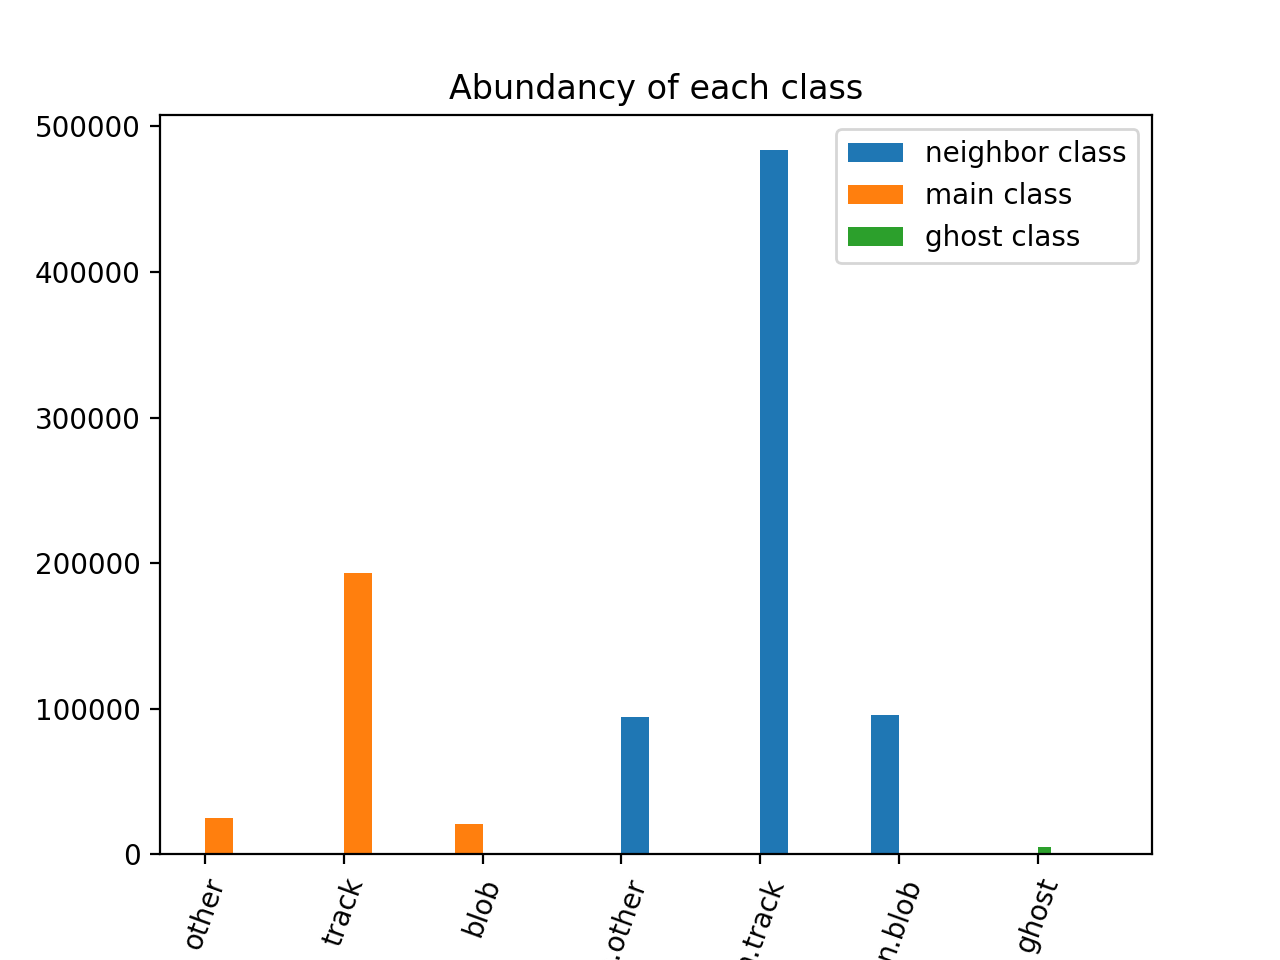

In [22]:
%matplotlib notebook
plt.hist(neigh_voxels_all.segclass, label = 'neighbor class')
plt.hist(origi_voxels_all.segclass, label = 'main class')
plt.hist(ghost_voxels_all.segclass, label = 'ghost class')
plt.title('Abundancy of each class')
plt.xticks(ticks = [1, 2, 3, 4, 5, 6, 7], 
           labels = ['other', 'track', 'blob', 'n.other', 'n.track', 'n.blob', 'ghost'], 
           rotation = 70)
plt.legend()
plt.show()

In [23]:
origi_abund_all = np.histogram(origi_voxels_all.segclass, bins = 3)[0]
neigh_abund_all = np.histogram(neigh_voxels_all.segclass, bins = 3)[0]
ghost_abund_all = np.histogram(ghost_voxels_all.segclass, bins = 3)[0]

In [24]:
print('Ratio track/other MC', origi_abund_all[1]/origi_abund_all[0], 'vs neighbours', neigh_abund_all[1]/neigh_abund_all[0])
print('Ratio track/blob MC',  origi_abund_all[1]/origi_abund_all[2], 'vs neighbours', neigh_abund_all[1]/neigh_abund_all[2])
print('Ratio other/blob MC',  origi_abund_all[0]/origi_abund_all[2], 'vs neighbours', neigh_abund_all[0]/neigh_abund_all[2])

Ratio track/other MC 7.683787547244878 vs neighbours 5.118054967392225
Ratio track/blob MC 9.373519704911667 vs neighbours 5.066189493099148
Ratio other/blob MC 1.2199087555814405 vs neighbours 0.9898661748215839


Hacer eficiencias de los cortes... esto para hits de MC es inmediato pienso (pq tengo las originales y las de despues del fiducial), para hits beersheba tengo las originales pero no las de despues del fiducial, quizás modificar funciones para q me dé el output. Luego para voxels fácil porque los voxeles con el corte los tengo yes or yes en los archivos de salida, y los voxeles sin corte sería hacer la producción igualmente sin corte.

Básicamente, lo que puedo hacer es añadir tb los hits de beersheba y hacer dos producciones: una con corte y otra sin corte, y así comparar hits/voxels de MC/beersheba (4 comparaciones)

O quizás pues hacer yo el corte a mano rápido pq tampoco era tan complicado pienso... además el voxelizado sin corte y con corte se puede hacer tan sólo con 2 producciones... y quizás comparar la diferencia entre sacar hits o sacar evento entero... en ppio si sacar hits no hace que se desconecten pues debería estar bien, y mirar cual es la eficiencia si quito eventos enteros...

Por ejemplo, ahora tengo una producción de todo sin cortes... hago una con cortes tal y como estamos y lo único que me quedaría sería tener los hits beersheba con cortes pero pienso q lo puedo hacer bien easy a mano